In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'test_20241209'
file = os.listdir(path)
file.pop(0)

# find a file where an intensity peak appears
max_val = []
df_shape = []
for i in range(len(file)):
    df_temp = pd.read_csv(path+'/'+file[i], index_col='Time')
    max_val.append(df_temp.max(axis=1).max())
    df_shape.append(df_temp.shape)
max_val = pd.Series(max_val)
max_val

0        127.0
1        121.0
2        165.0
3        781.0
4        126.0
        ...   
190    46777.0
191     5695.0
192    46984.0
193    46849.0
194     5697.0
Length: 195, dtype: float64

In [6]:
max_val.to_csv('test2_overview.csv')

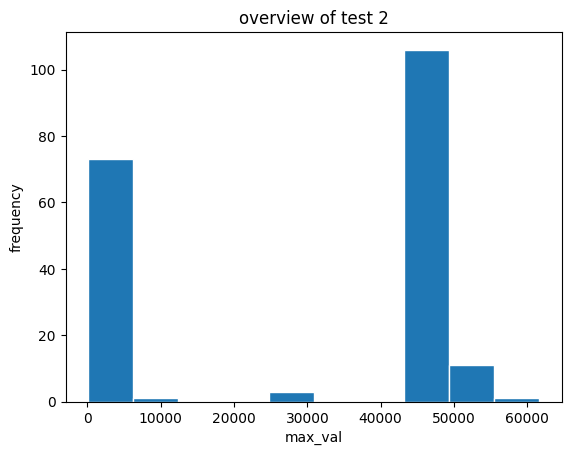

In [5]:
plt.hist(max_val, edgecolor='white')
plt.xlabel('max_val')
plt.ylabel('frequency')
plt.title('overview of test 2')
plt.show()

In [9]:
print(df16.index[-1], df16.columns[-1])

49.802 1191.8


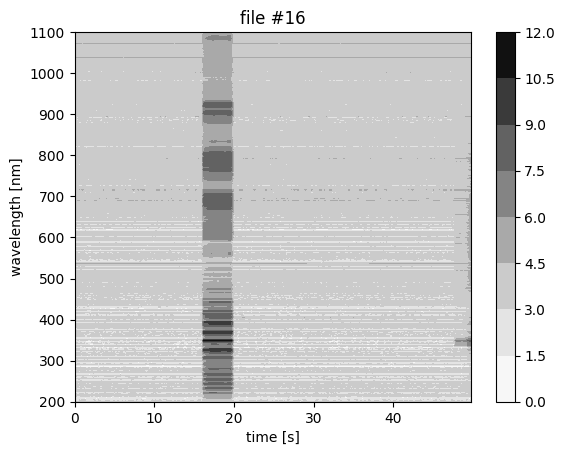

In [32]:
# file 16
df16 = pd.read_csv(path+'/'+file[16], index_col='Time')

# rename columns
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10
    
df16_new_cols = [str(DropFromSecond(x)) for x in df16.columns.astype(float)]
df16.columns = df16_new_cols

# replace negative values with zero
for i in range(len(df16.index)):
    for j in range(len(df16.columns)):
        if df16.iloc[i,j]<=1:
            df16.iloc[i,j]=0
        else:
            df16.iloc[i,j] = np.log(df16.iloc[i,j])

# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df16.index).reshape(-1, 1))
x = mm.transform(np.array(df16.index).reshape(-1, 1)).flatten() * df16.index[-1]

mm = MinMaxScaler()
mm.fit(np.array(df16.columns).reshape(-1, 1))
y = mm.transform(np.array(df16.columns).reshape(-1, 1)).flatten() * float(df16.columns[-1]) + 50

# x = range(len(df16.index))
# y = range(len(df16.columns))

X, Y = np.meshgrid(x, y)
Z = df16.T
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('file #16')
plt.colorbar()
plt.show()

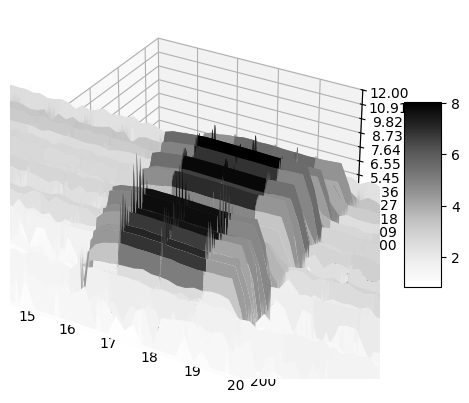

In [39]:
# Plot the surface.
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Greys) # linewidth=0, antialiased=False

# Customize the z axis.
ax.set_xlim(15,20)
ax.set_ylim(200,1100)
ax.set_zlim(0,12)
ax.zaxis.set_major_locator(LinearLocator(12))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [23]:
# the rest of process; 16 - 195 
# combine 60 of them 
df_rest1 = []
df_rest2 = []
df_rest3 = []

for i in range(15,15+60):
    df_rest1.append(pd.read_csv(path+'/'+file[i], index_col='Time'))
for j in range(15+60,15+60+60):
    df_rest2.append(pd.read_csv(path+'/'+file[j], index_col='Time'))
for k in range(15+60+60,15+60+60+60):
    df_rest3.append(pd.read_csv(path+'/'+file[k], index_col='Time'))

# match columns
for i in range(len(df_rest1)-1):
    df_rest1[i+1].columns = df_rest1[0].columns
for j in range(len(df_rest2)-1):
    df_rest2[j+1].columns = df_rest2[0].columns
for k in range(len(df_rest3)-1):
    df_rest3[k+1].columns = df_rest3[0].columns
    
# merge
df1 = pd.concat(df_rest1, ignore_index=True)
df2 = pd.concat(df_rest2, ignore_index=True)
df3 = pd.concat(df_rest3, ignore_index=True)

print(len(df_rest1), len(df_rest2), len(df_rest3))
print(df1.shape, df2.shape, df3.shape)

60 60 60
(15000, 2048) (15000, 2048) (14975, 2048)


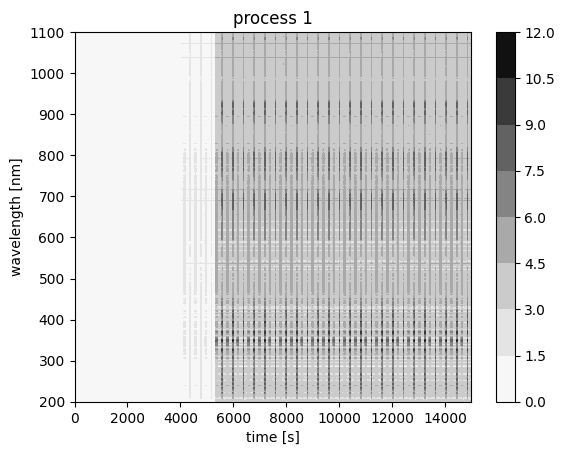

In [43]:
# first plot
# replace negative values with zero
for i in range(len(df1.index)):
    for j in range(len(df1.columns)):
        if df1.iloc[i,j]<=1:
            df1.iloc[i,j]=0
        else:
            df1.iloc[i,j] = np.log(df1.iloc[i,j])
            
# scaling
mm = MinMaxScaler()
mm.fit(np.array(df1.index).reshape(-1, 1))
x = mm.transform(np.array(df1.index).reshape(-1, 1)).flatten() * df1.index[-1]

mm = MinMaxScaler()
mm.fit(np.array(df1.columns).reshape(-1, 1))
y = mm.transform(np.array(df1.columns).reshape(-1, 1)).flatten() * float(df1.columns[-1]) + 50

X, Y = np.meshgrid(x, y)
Z = df1.T

# plt.figure(figsize=(25,10))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('process 1')
plt.colorbar()
plt.show()

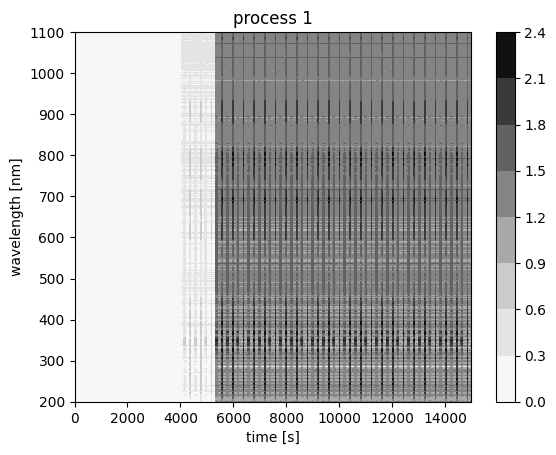

In [44]:
# first plot
# replace negative values with zero
for i in range(len(df1.index)):
    for j in range(len(df1.columns)):
        if df1.iloc[i,j]<=1:
            df1.iloc[i,j]=0
        else:
            df1.iloc[i,j] = np.log(df1.iloc[i,j])
            
# scaling
mm = MinMaxScaler()
mm.fit(np.array(df1.index).reshape(-1, 1))
x = mm.transform(np.array(df1.index).reshape(-1, 1)).flatten() * df1.index[-1]

mm = MinMaxScaler()
mm.fit(np.array(df1.columns).reshape(-1, 1))
y = mm.transform(np.array(df1.columns).reshape(-1, 1)).flatten() * float(df1.columns[-1]) + 50

X, Y = np.meshgrid(x, y)
Z = df1.T

# plt.figure(figsize=(25,10))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('process 1')
plt.colorbar()
plt.show()

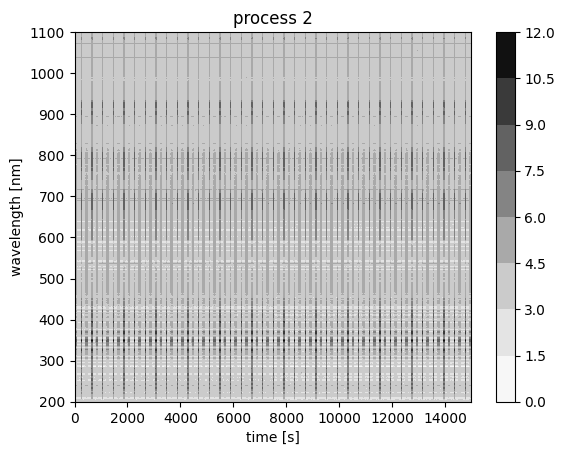

In [45]:
# first plot
# replace negative values with zero
for i in range(len(df2.index)):
    for j in range(len(df2.columns)):
        if df2.iloc[i,j]<=1:
            df2.iloc[i,j]=0
        else:
            df2.iloc[i,j] = np.log(df2.iloc[i,j])
            
# scaling
mm = MinMaxScaler()
mm.fit(np.array(df2.index).reshape(-1, 1))
x = mm.transform(np.array(df2.index).reshape(-1, 1)).flatten() * df2.index[-1]

mm = MinMaxScaler()
mm.fit(np.array(df2.columns).reshape(-1, 1))
y = mm.transform(np.array(df2.columns).reshape(-1, 1)).flatten() * float(df2.columns[-1]) + 50

X, Y = np.meshgrid(x, y)
Z = df2.T

plt.figure(figsize=(25,10))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('process 2')
plt.colorbar()
plt.show()

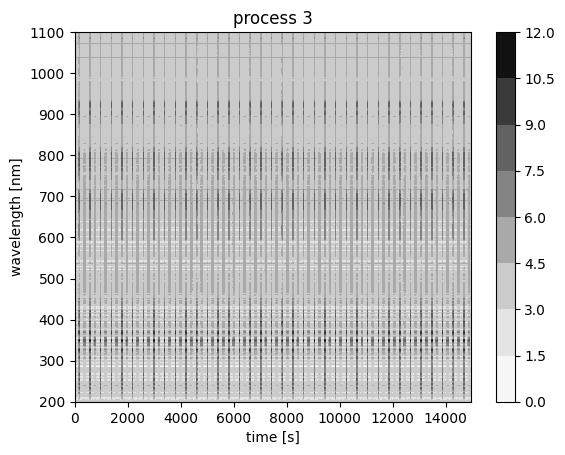

In [46]:
# first plot
# replace negative values with zero
for i in range(len(df3.index)):
    for j in range(len(df3.columns)):
        if df3.iloc[i,j]<=1:
            df3.iloc[i,j]=0
        else:
            df3.iloc[i,j] = np.log(df3.iloc[i,j])
            
# scaling
mm = MinMaxScaler()
mm.fit(np.array(df3.index).reshape(-1, 1))
x = mm.transform(np.array(df3.index).reshape(-1, 1)).flatten() * df3.index[-1]

mm = MinMaxScaler()
mm.fit(np.array(df3.columns).reshape(-1, 1))
y = mm.transform(np.array(df3.columns).reshape(-1, 1)).flatten() * float(df3.columns[-1]) + 50

X, Y = np.meshgrid(x, y)
Z = df3.T

plt.figure(figsize=(25,10))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('process 3')
plt.colorbar()
plt.show()